Generation: 1	Fitness: 338177.75931307935	Population: 75
Generation: 2	Fitness: 338177.75931307935	Population: 48
Generation: 3	Fitness: 338177.75931307935	Population: 46
Generation: 4	Fitness: 338177.75754217635	Population: 53
Generation: 5	Fitness: 338177.75754217635	Population: 51
Generation: 6	Fitness: 338177.75754217635	Population: 53
Generation: 7	Fitness: 338177.75754217635	Population: 49
Generation: 8	Fitness: 335053.75290734175	Population: 52
Generation: 9	Fitness: 335053.75290734175	Population: 38
Generation: 10	Fitness: 314488.8401814213	Population: 52
Generation: 11	Fitness: 314488.83947676996	Population: 44
Generation: 12	Fitness: 314488.83947676996	Population: 50
Generation: 13	Fitness: 314488.83947676996	Population: 44
Generation: 14	Fitness: 314488.83947676996	Population: 53
Generation: 15	Fitness: 283519.8653262733	Population: 55
Generation: 16	Fitness: 283519.864168947	Population: 51
Generation: 17	Fitness: 283519.864168947	Population: 44
Generation: 18	Fitness: 28351

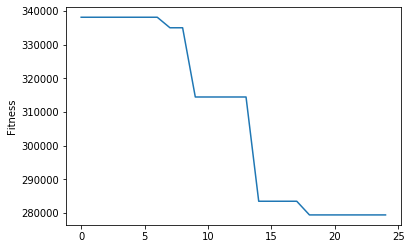

In [164]:
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta
import pandas as pd

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog():
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)

# lấy dữ liệu từ excel
df_course = pd.read_excel(r'C:\Users\DUONG\Desktop\data_recom.xlsx', sheet_name = 'Courses')
df_lo = pd.read_excel(r'C:\Users\DUONG\Desktop\data_recom.xlsx', sheet_name = 'Learning_outcomes')
df_job = pd.read_excel(r'C:\Users\DUONG\Desktop\data_recom.xlsx', sheet_name = 'Path_Jobs')

S = [i for i in range (1,len(df_lo['name'])+1)]
course = [i for i in range (1,len(df_course['name'])+1)]

course_rating = df_course['rate'].copy()
course_number_enroll = df_course['number_enrollment'].copy()
# course_price = [random.randint(50,100) for i in range(len(course_rating))]
course_price = [49] * len(course_rating)
course_duration = df_course['duration'].copy()

knowledge_graph = [[0 for i in range(len(S))] for i in range(len(S))]
course_achi = [[0 for i in range(len(S))] for i in range(len(course))]

checknan = df_lo['require'].isnull()

for i in range(len(df_lo['name'])):
    x = df_lo['require'][i]
    if not checknan[i]:
        val = x.split(';')
        for j in val:
            if j != '':
                knowledge_graph[i][int(j)-1] = 1
                
for i in range(len(df_course['name'])):
    x = df_course['LOs'][i]
    val = x.split(';')
    for j in val:
        if j != '':
            course_achi[i][int(j)-1] = 1            

job_applied = [6]
            
# cột mốc
milestone = [0] * len(S)
for i in job_applied: 
    path = df_job['path'][i]
    x = path.split(';')
    for i in x:
        milestone[int(i)-1] = 1
# 7 kĩ năng
inputM = [0] * len(S)

achiM = []
for i,j in zip (inputM,milestone):
    achiM.append(1 if i == 0 and j == 1 else 0)
    
B = 100000
Wf = [1,1,1,1,1]

start = time()
atexit.register(endlog)
log("")

number_population = round(len(course) * 0.3)
fitness_plot = []
E1 = 0
E2 = 0
E3 = sum(course_rating) / len(course)
E4 = sum(course_number_enroll) / len(course)
E5 = 0
#4.420817843866172
#59734.41994423792

def LOinCourse(courses):
    c = []
    for i in courses: 
        path = df_course['LOs'][i-1]
        x = path.split(';')
        for j in x:
            if j == '':
                continue
            if j not in c:
                c.append(j)
            require_path = df_lo['require'][int(j)-1]
            if not checknan[int(j)-1]:
                val = require_path.split(';')
                for k in val:
                    if k != '':
                        if k not in c:
                            c.append(k)
    return c

def checkReverse(cur,tar):
    t = []
    for i,j in zip(cur,tar):
        t.append(i-j)
    return t

def updateScoreNeeded(cur):
    t = []
    for i,j in zip(milestone,cur):
        t.append(1 if i == 1 and j == 0 else 0)
    return t

def updateCurrentScroce(cur,nex):
    t = []
    for i,j in zip(cur,nex):
        t.append(0 if i == 0 and j == 0 else 1)
    return t

def CanAttendCourse(cur,nex):
    for i,j in zip(cur,nex):
        if j - i == 1:
            return False
    return True

class Choromosome(object):
    def __init__(self,genes,one_row):
        self.one_row = one_row.copy()
        self.genes = genes.copy()
        self.fitness = self.cal_fitness()
    
    def cal_fitness(self):
        
        f1 = 0; f2 = 0; f3 = 0; f4 = 0; f5 = 0;
        gene_copy = self.genes.copy()
        f1 = Choromosome.getLearningPathF1(gene_copy)
        
        f2 = Choromosome.getDurationF2(self.one_row)
        
        f3 = Choromosome.getRatingF3(self.one_row)
        
        f4 = Choromosome.getEnrollNumberF4(self.one_row)
        
        f5 = Choromosome.getCostF5(self.one_row)

        return Choromosome.calcualateFitness(f1,f2,f3,f4,f5)
    
    def calcualateFitness(f1,f2,f3,f4,f5):
        return math.sqrt(math.pow(E1-f1,2) * Wf[0] + math.pow(E2-f2,2) * Wf[1] + math.pow(E3-f3,2) * Wf[2] + math.pow(E4-f4,2) * Wf[3] + math.pow(E5-f5,2) * Wf[4])
    
    def getDurationF2(cur):
        F2 = 0 
        for i in cur:
            F2 += course_duration[i-1]
        return F2

    def getRatingF3(cur):
        F3 = 0 
        for i in cur:
            F3 += course_rating[i-1]
        return F3
    
    def getEnrollNumberF4(cur):
        F4 = 0 
        for i in cur:
            F4 += course_number_enroll[i-1]
        return F4
    
    def getCostF5(cur):
        F5 = 0 
        for i in cur:
            F5 += course_price[i-1]
        return F5
    
    def getLearningPathF1(abc):
        self = abc.copy()
        lst = []
        lastTime = 0 
        DEG = [0] * 10005
        for i in range(0,len(course)+1):
            for j in range(0,len(course)):
                if self[i][j] == 1:
                    DEG[j+1] += 1
        dEnd = [0] * 10005
        dEnd[0] = 0
        for i in range(1,len(course)+1):
            dEnd[i] =  1e9
        lst.append(0)
        while len(lst) > 0:
            x = lst[0]
            lst.remove(x)
            curEnd = 0
            for i in range(0,len(course)):
                if self[x][i] == 1:
                    DEG[i+1] -= 1
                    if DEG[i+1] == 0:
                        lst.append(i+1)
            if x > 0:
                for i in range(0,len(course)+1):
                    if self[i][x-1] == 1:
                        curEnd = max(curEnd,dEnd[i]+course_duration[x-1])
            dEnd[x] = curEnd
            lastTime = max(lastTime,dEnd[x])
        return lastTime
    
    def getSameCourse(c1,c2):
        same_course = []
        for i in c1:
            if i in c2:
                same_course.append(i)
        return same_course
    
    def crossover(self,partner):
        child1 = self.one_row.copy()
        child2 = partner.one_row.copy()
        prob = random.random()
        index = random.randint(0,len(child1)-1) if len(child1)< len(child2) else random.randint(0,len(child2)-1)
        if prob < 0.6:
            temp = child1[index]
            child1[index] = child2[index]
            child2[index] = temp
        elif prob < 0.7:
            None
        else:
            if random.random() < 0.5:
                child1 = Choromosome.mutateChro(child1.copy())
            else:
                child2 = Choromosome.mutateChro(child2.copy())
            return child1,child2
        self_temp = child1.copy()
        partner_temp = child2.copy()
        self_check,self_temp = Choromosome.reArrangeChro(self_temp)
        partner_check,partner_temp = Choromosome.reArrangeChro(partner_temp)
        if not self_check:
#             child1 = Choromosome.fixChro(self_temp.copy())
#             child1 = Choromosome.removeIfNotNeed(child1.copy())
            child1 = []
        else:
            child1 = self_temp.copy()
            child1 = Choromosome.removeIfNotNeed(child1.copy())
        if not partner_check:
#             child2 = Choromosome.fixChro(partner_temp.copy())
#             child2 = Choromosome.removeIfNotNeed(child2.copy())
            child2 = []
        else:
            child2 = partner_temp.copy()
            child2 = Choromosome.removeIfNotNeed(child2.copy())
#         if Choromosome.isValidChro(child1):
#             child1 = Choromosome.removeIfNotNeed(child1.copy())
#         else:
#             child1 = []
#         if Choromosome.isValidChro(child2):
#             child2 = Choromosome.removeIfNotNeed(child2.copy())
#         else:
#             child2 = []
        return child1,child2

    def isValidChroVer2(self):
        list_course = []
        input_temp = inputM.copy()
        achiM_copy = achiM.copy()
        for i in self:
            if checkLearningOutcomeDepenWithCourse(course_achi[i-1],input_temp):
                input_temp = updateCurrentScroce(input_temp,course_achi[i-1])
                achiM_copy = updateScoreNeeded(input_temp)
            else:
                return False
        nb = len([i for i in achiM_copy if i == 1])
        if nb == 0:
            return True
        return False
    
    def isValidChro(self):
        input_temp = inputM.copy()
        achiM_copy = achiM.copy()
        for i in self:
            input_temp = updateCurrentScroce(input_temp,course_achi[i-1])
            achiM_copy = updateScoreNeeded(input_temp)
        nb = len([i for i in achiM_copy if i == 1])
        if nb > 0:
            return False
        return True
    
    def similarCourse(index):
        cur_course = course_achi[index - 1].copy()
        nb_similar = 0
        index_course = 0
        for i in course:
            if nb_similar < Choromosome.getSimiNb(cur_course,course_achi[i-1]):
                index_course = i
                nb_similar = Choromosome.getSimiNb(cur_course,course_achi[i-1])
        return index_course
    
    def getSimiNb(cur,nex):
        cout = 0 
        for i,j in zip(cur,nex):
            if i == 1 and i == j:
                cout += 1
        return cout
    
    def removeIfNotNeed(cur):
        if len(cur) == 0:
            return cur
        cou = cur.copy()
        for i in cur:
            b = cou.copy()
            b.remove(i)
            if Choromosome.checkNeeded(b.copy()):
                cou = b.copy()
        return cou
    
    def checkNeeded(course):
        couse_choose = []
        path_copy = course.copy()
        index = 0
        loop_time = 0
        input_copy = inputM.copy()
        achi_copy = achiM.copy()
        nb = len([i for i in achi_copy if i == 1])
        while nb > 0 and loop_time <= len(path_copy) * len(path_copy):
            loop_time = loop_time + 1
            if path_copy[index] not in couse_choose and checkLearningOutcomeDepenWithCourse(course_achi[path_copy[index]-1],input_copy):
                couse_choose.append(path_copy[index])
                input_copy = updateCurrentScroce(input_copy,course_achi[path_copy[index]-1])
                achi_copy = updateScoreNeeded(input_copy)
                nb = len([i for i in achi_copy if i == 1])
                index = (index + 1) if index < len(path_copy)-1 else 0
            else: 
                index = (index +1) if index < len(path_copy)-1 else 0
            if nb == 0:
                return True
        return False
    
    def reArrangeChro(self):
        self_copy = self.copy()
        temp_curIn = inputM.copy()
        achi_copy = achiM.copy()
        nb = len([i for i in achi_copy if i == 1])
        course_choose_1_flow = []
        random.shuffle(self_copy)
        for i in self_copy:
            for j in self_copy:
                if j not in course_choose_1_flow and checkLearningOutcomeDepenWithCourse(course_achi[j-1],temp_curIn):
                    course_choose_1_flow.append(j)
                    temp_curIn = updateCurrentScroce(temp_curIn,course_achi[j-1])
                    achi_copy = updateScoreNeeded(temp_curIn)
                    nb = len([i for i in achi_copy if i == 1])
                    if nb == 0:
                        return True,course_choose_1_flow
        if nb > 0:
            return False,course_choose_1_flow
        return True,course_choose_1_flow
    
    def fixChro(cur):
        empty_learning,temp_curIn,achi_copy = Choromosome.getIndexNotComplete(cur)
        length_empty = len(empty_learning)
        index = 0
        nb = len([i for i in achi_copy if i == 1])
        loop_time  = 0
        while nb > 0 and loop_time < len(empty_learning) * len(course) * 2:
            loop_time += 1
            index_learning = empty_learning[index]
            if not checkLearningOutcomeDepen(index_learning,temp_curIn):
                index = (index + 1) if index < (length_empty - 1) else 0
                continue
            index_course_need = [i for i in range(0,len(course_achi)) if course_achi[i][index_learning] == 1]
            random.shuffle(index_course_need)
            for i in index_course_need:
                index_course = i
                if (index_course + 1) not in cur and checkLearningOutcomeDepenWithCourse(course_achi[index_course],temp_curIn):
                    cur.append(index_course + 1)
                    temp_curIn = updateCurrentScroce(temp_curIn,course_achi[index_course])
                    achi_copy = updateScoreNeeded(temp_curIn)
                    nb = len([i for i in achi_copy if i == 1])
                    empty_learning.remove(index_learning)
                    length_empty = len(empty_learning)
                    index = (index + 1) if index < (length_empty - 1) else 0
                    break
        return cur
    
    def getIndexNotComplete(cur):
        index = []
        temp_curIn = inputM.copy()
        achi_copy = achiM.copy()
        for i in cur:
            temp_curIn = updateCurrentScroce(temp_curIn,course_achi[i-1])
            achi_copy = updateScoreNeeded(temp_curIn)
        for i in range (0,len(achi_copy)):
            if achi_copy[i] == 1:
                index.append(i)
        return index,temp_curIn,achi_copy
    
    def mutateChro(self):
        if len(self) == 0:
            return self
        path = self.copy()
        index = random.randint(0,len(path)-1)
        nearest_course = Choromosome.similarCourse(self[index])
        while nearest_course in self:
            nearest_course = random.choice(course)
        path[index] = nearest_course
        path_check,path = Choromosome.reArrangeChro(path)
        if path_check:
            return Choromosome.removeIfNotNeed(path.copy())
        return self
    
#     def mutateChro(self):
#         if len(self) == 0:
#             return self
#         path = self.copy()
#         index = random.randint(0,len(path)-1)
#         nearest_course = Choromosome.similarCourse(self[index])
#         while nearest_course in self:
#             nearest_course = random.choice(course)
#         path[index] = nearest_course
#         path_copy = path.copy()
#         path_check,path_copy = Choromosome.reArrangeChro(path_copy)
#         if not path_check:
#             path_copy = Choromosome.fixChro(path_copy)
#             if Choromosome.isValidChro(path_copy):
#                 path_copy = Choromosome.removeIfNotNeed(path_copy)
#                 return path_copy
#         path_copy = Choromosome.removeIfNotNeed(path_copy)
#         if Choromosome.isValidChro(path_copy):
#             return path_copy
#         return self

def getIndexNodeIfExist(one):
    for i in range(0,len(one)):
        if one[i] == 1:
            return one.index(1)
    return -1
    
def checkLearningOutcomeDepen(index_outcome,curr_achi):
    for i in range(0,len(knowledge_graph[index_outcome])):
        if knowledge_graph[index_outcome][i] == 1 and curr_achi[i] == 0:
            return False
    return True

def checkLearningOutcomeDepenBusiness(course_require,index_outcome,curr_achi):
    for i in range(0,len(knowledge_graph[index_outcome])):
        if knowledge_graph[index_outcome][i] == 1 and curr_achi[i] == 0 and course_require[i] == 0:
            return False
    return True

def checkLearningOutcomeDepenWithCourse(course_require,curr_achi):
    for i in range(0,len(course_require)):
        if course_require[i] == 1 and not checkLearningOutcomeDepenBusiness(course_require,i,curr_achi):
            return False
    return True

def convertToTree(self):
    genes = [[0 for i in range(len(course[::]))] for i in range(len(course[::])+1)]
    temp_curIn = inputM.copy()
    curRoot = inputM.copy()
    course_choose_1_flow = self.copy()
    for i in course_choose_1_flow:
        if checkLearningOutcomeDepenWithCourse(course_achi[i-1],temp_curIn):
            genes[0][i-1] = 1
            curRoot = updateCurrentScroce(curRoot,course_achi[i-1])
    for i in range(1,len(course_choose_1_flow)):
        temp_curIn = curRoot.copy()
        if genes[0][course_choose_1_flow[i]-1] == 0:
            for j in range(0,i):
                temp_curIn = updateCurrentScroce(temp_curIn,course_achi[course_choose_1_flow[j]-1])
                if checkLearningOutcomeDepenWithCourse(course_achi[course_choose_1_flow[i]-1],temp_curIn):
                    genes[course_choose_1_flow[j]][course_choose_1_flow[i]-1] = 1
                    cur_reverse = temp_curIn.copy()
                    for k in range(0,j):
                        if 1 not in genes[course_choose_1_flow[j-k-1]] and genes[0][course_choose_1_flow[k]-1] != 1:
                            cur_reverse = checkReverse(cur_reverse,course_achi[course_choose_1_flow[j-k-1]-1])
                            if checkLearningOutcomeDepenWithCourse(course_achi[course_choose_1_flow[i]-1],cur_reverse):
                                genes[course_choose_1_flow[j-k-1]][course_choose_1_flow[i]-1] = 1
                    break
    return genes

def main():
    global fitness_plot
    number_population
    generation = 0
    isRun = True
    cur_objective = 0
    ct = 0
    # initialize population
    population = []
    for i in range(number_population):
        achiM_copy = achiM.copy()
        inputM_copy = inputM.copy()
        temp_curIn = inputM_copy.copy()
        course_choose_1_flow = []
        nb = len([i for i in achiM_copy if i == 1])
        index_outcome = 0
        while nb > 0:
            val = achiM_copy[index_outcome]
            if val == 0 and not checkLearningOutcomeDepen(index_outcome,temp_curIn):
                index_outcome = (index_outcome + 1) if index_outcome < len(inputM)-1 else 0
                continue
            index_course_need = [i for i in range(0,len(course_achi)) if course_achi[i][index_outcome] == 1]
            random.shuffle(index_course_need)
            for i in index_course_need:
                indexCourse = i
                if indexCourse + 1 not in course_choose_1_flow and checkLearningOutcomeDepenWithCourse(course_achi[indexCourse],temp_curIn):
                    course_choose_1_flow.append(indexCourse+1)
                    temp_curIn = updateCurrentScroce(temp_curIn,course_achi[indexCourse])
                    achiM_copy = updateScoreNeeded(temp_curIn)
                    nb = len([k for k in achiM_copy if k == 1])
                    break
            index_outcome = (index_outcome + 1) if index_outcome < len(inputM)-1 else 0
        # chuyển về ma trận biểu diễn tree
        course_choose_1_flow = Choromosome.removeIfNotNeed(course_choose_1_flow.copy())
        genes = convertToTree(course_choose_1_flow)
        population.append(Choromosome(genes.copy(),course_choose_1_flow))
#     a = [1,3,2]
#     genes = convertToTree(a)
#     population.append(Choromosome(genes.copy(),a))
#     print(population[len(population)-1].fitness)
#     print(Choromosome.getLearningPathF1(genes))
    while isRun:
        population = sorted(population, key = lambda x:x.fitness)
        new_generation = []
        s = int((10*number_population)/100)
        new_generation.extend(population[:s])
        
        s = int((90*number_population)/100)
        for _ in range(round(s/2)):
            parent1 = random.choice(population[:round(number_population*0.5)])
            parent2 = random.choice(population[:round(number_population*0.5)])
            child1,child2 = parent1.crossover(parent2)
            if len(child1) > 0:
                genes = convertToTree(child1)
                new_generation.append(Choromosome(genes.copy(),child1.copy()))
            if len(child2) > 0:
                genes = convertToTree(child2)
                new_generation.append(Choromosome(genes.copy(),child2.copy()))

        population = new_generation.copy()
        generation += 1
        population = sorted(population, key = lambda x:x.fitness)
        print("Generation: {0}\tFitness: {1}\tPopulation: {2}".
        format(generation,population[0].fitness,len(population)))

        fitness_plot.append(population[0].fitness)
        if cur_objective == population[0].fitness:
            cur_objective = population[0].fitness
            ct += 1
        else:
            ct = 0
            cur_objective = population[0].fitness
        if ct >= 5:
            isRun = False
    
    ff1 = Choromosome.getLearningPathF1(population[0].genes)
    ff2 = Choromosome.getDurationF2(population[0].one_row)
    ff3 = Choromosome.getRatingF3(population[0].one_row)
    ff4 = Choromosome.getEnrollNumberF4(population[0].one_row)
    ff5 = Choromosome.getCostF5(population[0].one_row)
    
    print("{0}\t{1}\t{2}\t{3}\t{4}".
        format(ff1,ff2,ff3,ff4,ff5))
    
    print(population[0].one_row)
#     for i in population[0].one_row:
#         print(course_achi[i-1])
#     print(len(LOinCourse(population[0].one_row)))
if __name__ == '__main__':
    main()
print(E4)
plt.plot(fitness_plot)
plt.ylabel('Fitness')

print("\n\nExcution time: {0}s".format(endlog()))